In [1]:
#Author : M. Alfa Riza
#Email : malfariza45@gmail.com
#Date : 20-10-2020
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
    -O /tmp/rockpaperscissors.zip

--2020-10-23 06:54:08--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  22.4MB/s    in 25s     

2020-10-23 06:54:33 (12.2 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [3]:
# melakukan ekstraksi pada file zip
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()


In [4]:
#membuat base direktori dan mengeceknya
base_dir = '/tmp/rockpaperscissors/rps-cv-images'
os.listdir(base_dir)

['rock', 'scissors', 'paper', 'README_rpc-cv-images.txt']

In [5]:
# membuat direktori batu
rock_dir = os.path.join(base_dir, 'rock')

# membuat direktori gunting
scissors_dir = os.path.join(base_dir, 'scissors')

# membuat direktori kertas
paper_dir = os.path.join(base_dir, 'paper')

In [6]:
#cek jumlah gambar batu
print('total training rock images:', len(os.listdir(rock_dir)))
#cek jumlah gambar gunting
print('total training scissors images:', len(os.listdir(scissors_dir)))
#cek jumlah gambar kertas
print('total training paper images:', len(os.listdir(paper_dir)))

total training rock images: 726
total training scissors images: 750
total training paper images: 712


In [8]:
#train datagen
train_datagen = ImageDataGenerator(rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range = 0.2,
    fill_mode = 'nearest',
    validation_split=0.4) # 40% validation split

In [9]:
#train generator dan validation generator
train_dir = '/tmp/rockpaperscissors/rps-cv-images'
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
    batch_size=4,
    class_mode='categorical',
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
    batch_size=4,
    class_mode='categorical',
    subset='validation') # set as validation data

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [10]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

#ringkasan dari model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [11]:
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(
    train_generator, 
    epochs=25, 
    steps_per_epoch=25, 
    validation_data = validation_generator, 
    verbose = 1, 
    validation_steps=3)

Epoch 1/25
25/25 [==============================] - 8s 326ms/step - loss: 1.3113 - accuracy: 0.3100 - val_loss: 1.2233 - val_accuracy: 0.0833
Epoch 2/25
25/25 [==============================] - 8s 322ms/step - loss: 1.1113 - accuracy: 0.3600 - val_loss: 1.0824 - val_accuracy: 0.5833
Epoch 3/25
25/25 [==============================] - 8s 320ms/step - loss: 1.1482 - accuracy: 0.3700 - val_loss: 1.0732 - val_accuracy: 0.5000
Epoch 4/25
25/25 [==============================] - 8s 319ms/step - loss: 1.1064 - accuracy: 0.4500 - val_loss: 0.9588 - val_accuracy: 0.5833
Epoch 5/25
25/25 [==============================] - 8s 319ms/step - loss: 1.0629 - accuracy: 0.5000 - val_loss: 1.3214 - val_accuracy: 0.2500
Epoch 6/25
25/25 [==============================] - 8s 320ms/step - loss: 0.9989 - accuracy: 0.5700 - val_loss: 0.4932 - val_accuracy: 0.8333
Epoch 7/25
25/25 [==============================] - 8s 320ms/step - loss: 0.8193 - accuracy: 0.6700 - val_loss: 1.1101 - val_accuracy: 0.5833
Epoch 

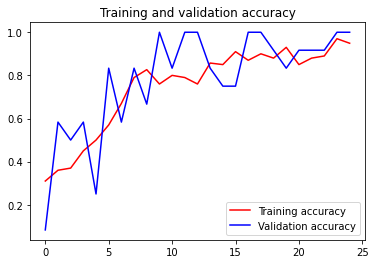

<Figure size 432x288 with 0 Axes>

In [12]:
#buat grafik akurasi
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

Saving 2gd0aqAxW55bHZP9.png to 2gd0aqAxW55bHZP9.png
2gd0aqAxW55bHZP9.png
[[0. 0. 1.]]
Scissors


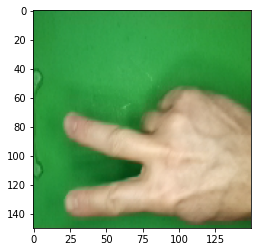

In [18]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  print(classes)

  if classes[0,0]!=0:
    print('Paper')
  elif classes[0,1]!=0:
    print('Rock')
  else :
    print('Scissors')